<a href="https://colab.research.google.com/github/jomariy241/assignment/blob/main/Supervised_Learning_Assignment_loan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('/content/Loan_Default.csv.zip')

In [3]:
data.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [5]:
data.describe()

,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
count,148670.000000,148670.0,1.486700e+05,112231.000000,112031.000000,109028.000000,148629.000000,1.335720e+05,139520.000000,148670.000000,133572.000000,148670.000000,124549.000000
mean,99224.500000,2019.0,3.311177e+05,4.045476,0.441656,3224.996127,335.136582,4.978935e+05,6957.338876,699.789103,72.746457,0.246445,37.732932
std,42917.476598,0.0,1.839093e+05,0.561391,0.513043,3251.121510,58.409084,3.599353e+05,6496.586382,115.875857,39.967603,0.430942,10.545435
min,24890.000000,2019.0,1.650000e+04,0.000000,-3.638000,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000,5.000000
25%,62057.250000,2019.0,1.965000e+05,3.625000,0.076000,581.490000,360.000000,2.680000e+05,3720.000000,599.000000,60.474860,0.000000,31.000000
50%,99224.500000,2019.0,2.965000e+05,3.990000,0.390400,2596.450000,360.000000,4.180000e+05,5760.000000,699.000000,75.135870,0.000000,39.000000
75%,136391.750000,2019.0,4.365000e+05,4.375000,0.775400,4812.500000,360.000000,6.280000e+05,8520.000000,800.000000,86.184211,0.000000,45.000000
max,173559.000000,2019.0,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000,61.000000


In [6]:
data.isnull().sum()

,0
ID,0
year,0
loan_limit,3344
Gender,0
approv_in_adv,908
loan_type,0
loan_purpose,134
Credit_Worthiness,0
open_credit,0
business_or_commercial,0


In [7]:
data.dtypes

,0
ID,int64
year,int64
loan_limit,object
Gender,object
approv_in_adv,object
loan_type,object
loan_purpose,object
Credit_Worthiness,object
open_credit,object
business_or_commercial,object


In [8]:
data.duplicated().sum()

0

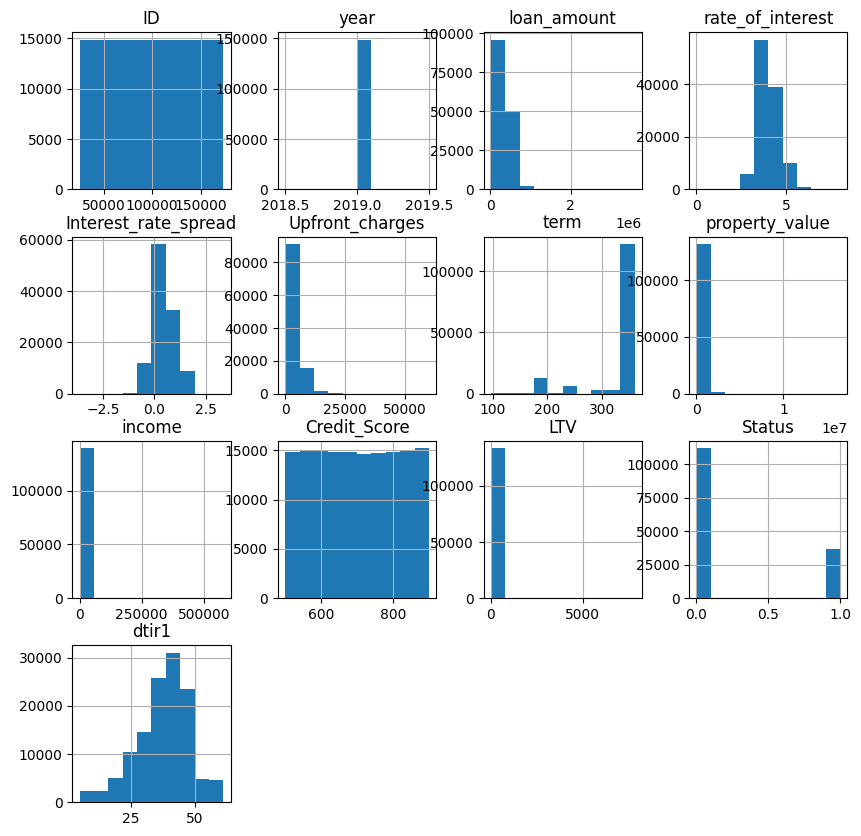

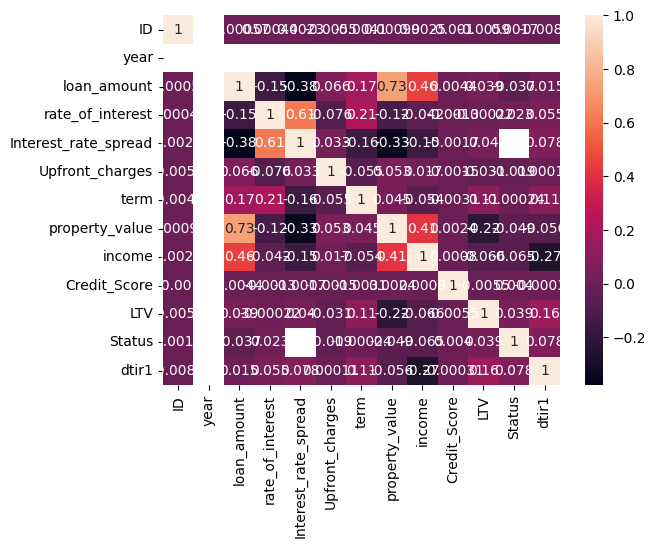

In [9]:
#Visualization
numeric_data = data.select_dtypes(include=['number'])
numeric_data.hist(figsize=(10, 10))
plt.show()
sns.heatmap(numeric_data.corr(), annot=True)
plt.show()

In [10]:
data.drop('year', axis = 1)

,ID,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,cf,Male,pre,type1,p1,l1,nopc,nob/c,406500,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,cf,Joint,pre,type1,p1,l1,nopc,nob/c,696500,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,173555,cf,Sex Not Available,nopre,type1,p3,l1,nopc,nob/c,436500,...,CIB,659,EXP,55-64,to_inst,71.792763,south,direct,0,48.0
148666,173556,cf,Male,nopre,type1,p1,l1,nopc,nob/c,586500,...,CIB,569,CIB,25-34,not_inst,74.428934,south,direct,0,15.0
148667,173557,cf,Male,nopre,type1,p4,l1,nopc,nob/c,446500,...,CIB,702,EXP,45-54,not_inst,61.332418,North,direct,0,49.0
148668,173558,cf,Female,nopre,type1,p4,l1,nopc,nob/c,196500,...,EXP,737,EXP,55-64,to_inst,70.683453,North,direct,0,29.0


In [19]:
# handling missing value
from sklearn.impute import SimpleImputer
imputer = SimpleImputer()
data[['Interest_rate_spread','Upfront_charges','rate_of_interest', 'term','property_value','income','dtir1','LTV']] = imputer.fit_transform(data[['Interest_rate_spread','Upfront_charges','rate_of_interest', 'term','property_value','income','dtir1','LTV']])


imputer = SimpleImputer(strategy='most_frequent')
data[['age' ,'loan_limit']] = imputer.fit_transform(data
[['age' , 'loan_limit']])

In [20]:
data.dropna(inplace = True)

In [21]:
data.isna().sum()

,0
ID,0
year,0
loan_limit,0
Gender,0
approv_in_adv,0
loan_type,0
loan_purpose,0
Credit_Worthiness,0
open_credit,0
business_or_commercial,0


In [24]:
objList = data.select_dtypes(include = "object").columns
print (objList)

Index(['loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'Credit_Worthiness', 'open_credit', 'business_or_commercial',
       'Neg_ammortization', 'interest_only', 'lump_sum_payment',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'credit_type', 'co-applicant_credit_type', 'age',
       'submission_of_application', 'Region', 'Security_Type'],
      dtype='object')


In [26]:
#label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for feat in objList:
    data[feat] = le.fit_transform(data[feat].astype(str))
data

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,0,3,0,0,0,0,0,1,...,3,758,0,0,1,98.728814,3,1,1,45.000000
1,24891,2019,0,2,0,1,0,0,0,0,...,2,552,1,3,1,72.746457,0,1,1,37.732932
2,24892,2019,0,2,1,0,0,0,0,1,...,3,834,0,1,1,80.019685,3,1,0,46.000000
3,24893,2019,0,2,0,0,3,0,0,1,...,3,587,0,2,0,69.376900,0,1,0,42.000000
4,24894,2019,0,1,1,0,0,0,0,1,...,1,602,1,0,0,91.886544,0,1,0,39.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,173555,2019,0,3,0,0,2,0,0,1,...,0,659,1,3,1,71.792763,3,1,0,48.000000
148666,173556,2019,0,2,0,0,0,0,0,1,...,0,569,0,0,0,74.428934,3,1,0,15.000000
148667,173557,2019,0,2,0,0,3,0,0,1,...,0,702,1,2,0,61.332418,0,1,0,49.000000
148668,173558,2019,0,0,0,0,3,0,0,1,...,3,737,1,3,1,70.683453,0,1,0,29.000000


In [28]:
#scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
df

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,-1.731475,0.0,-0.266356,1.322529,-0.430908,-0.519288,-1.648031,-0.211787,-0.061384,0.401468,...,1.394649,0.502745,-0.997905,-1.473552,0.741861,0.683792,1.091399,0.014969,1.753951,0.752519
1,-1.731452,0.0,-0.266356,0.373707,-0.430908,1.019801,-1.648031,-0.211787,-0.061384,-2.490858,...,0.557693,-1.275172,1.002100,0.499797,0.741861,0.000370,-0.974414,0.014969,1.753951,0.000108
2,-1.731428,0.0,-0.266356,0.373707,2.320682,-0.519288,-1.648031,-0.211787,-0.061384,0.401468,...,1.394649,1.158676,-0.997905,-0.815769,0.741861,0.191680,1.091399,0.014969,-0.570141,0.856056
3,-1.731405,0.0,-0.266356,0.373707,-0.430908,-0.519288,0.976690,-0.211787,-0.061384,0.401468,...,1.394649,-0.973099,-0.997905,-0.157986,-1.347961,-0.088260,-0.974414,0.014969,-0.570141,0.441908
4,-1.731382,0.0,-0.266356,-0.575116,2.320682,-0.519288,-1.648031,-0.211787,-0.061384,0.401468,...,-0.279264,-0.843639,1.002100,-1.473552,-1.347961,0.503817,-0.974414,0.014969,-0.570141,0.131297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147310,1.731984,0.0,-0.266356,1.322529,-0.430908,-0.519288,0.101783,-0.211787,-0.061384,0.401468,...,-1.116220,-0.351691,1.002100,0.499797,0.741861,-0.024715,1.091399,0.014969,-0.570141,1.063131
147311,1.732007,0.0,-0.266356,0.373707,-0.430908,-0.519288,-1.648031,-0.211787,-0.061384,0.401468,...,-1.116220,-1.128451,-0.997905,-1.473552,-1.347961,0.044625,1.091399,0.014969,-0.570141,-2.353593
147312,1.732031,0.0,-0.266356,0.373707,-0.430908,-0.519288,0.976690,-0.211787,-0.061384,0.401468,...,-1.116220,0.019428,1.002100,-0.157986,-1.347961,-0.299857,-0.974414,0.014969,-0.570141,1.166668
147313,1.732054,0.0,-0.266356,-1.523939,-0.430908,-0.519288,0.976690,-0.211787,-0.061384,0.401468,...,1.394649,0.321501,1.002100,0.499797,0.741861,-0.053894,-0.974414,0.014969,-0.570141,-0.904074


In [32]:
#Splitting the data
from sklearn.model_selection import train_test_split
X = df.drop('Status', axis=1)
y = df['Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [35]:
X_train.shape

(117852, 33)

In [36]:
y_train.shape

(117852,)

In [37]:
X_test.shape

(29463, 33)

In [38]:
y_test.shape

(29463,)

In [41]:
new_data = data.sample(frac=1, random_state=42)
new_data.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
117252,142142,2019,0,1,0,0,3,0,0,1,...,0,725,1,3,0,39.186851,3,1,0,48.0
106329,131219,2019,0,1,0,0,2,0,0,1,...,0,506,1,2,0,44.377163,0,1,0,45.0
17537,42427,2019,0,3,0,0,2,0,0,1,...,3,545,0,1,1,67.405063,3,1,0,23.0
43208,68098,2019,0,2,0,0,2,0,0,1,...,3,853,0,3,1,67.959770,0,1,0,36.0
21378,46268,2019,0,2,0,2,2,0,0,1,...,0,531,0,3,1,65.756303,3,1,0,32.0


In [42]:
#Model Building
x_train = data.drop('Status',axis=1)
y_train = data['Status']

In [48]:
#create model import leanear regration
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [50]:
model=lr.fit(x_train,y_train)

In [52]:
#predict test data
pred=model.predict(X_test)
pred

array([1.18198947, 1.20160669, 1.03544597, ..., 1.13501817, 1.03926312,
       1.09945374])

In [53]:
#evaluate actual value and predict value
from sklearn.metrics import mean_squared_error
print('mse =',mean_squared_error(y_test,pred))
# 0 is perfect data

mse = 3.555323675898923


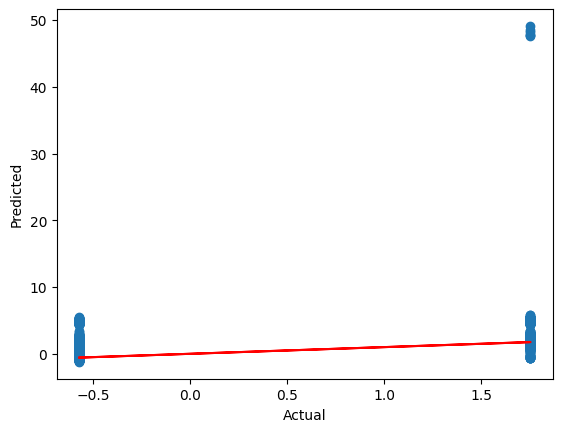

In [64]:
#ploting regression line
plt.scatter(y_test,pred)
plt.plot(y_test,y_test,color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [65]:
#knn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train)


KNeighborsClassifier(n_neighbors=7)

In [66]:
y_pred=knn.predict(X_test)


In [68]:
threshold_value = 0
y_test_binary = (y_test > threshold_value).astype(int)
fin = accuracy_score(y_test_binary, y_pred)
print(fin)

0.7542341241557208


In [69]:
print(knn.score(x_train,y_train))

0.8594440484675695


In [73]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
y_test_binary = (y_test > threshold_value).astype(int)
print(confusion_matrix(y_test_binary, y_pred))
print(classification_report(y_test_binary, y_pred))

[[22222     0]
 [ 7241     0]]
              precision    recall  f1-score   support

           0       0.75      1.00      0.86     22222
           1       0.00      0.00      0.00      7241

    accuracy                           0.75     29463
   macro avg       0.38      0.50      0.43     29463
weighted avg       0.57      0.75      0.65     29463



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


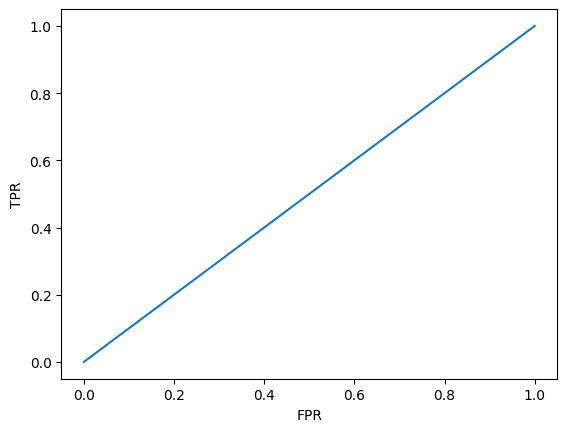

In [76]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4
threshold_value = 0
y_test_binary = (y_test > threshold_value).astype(int)

y_pred_proba = knn.predict_proba(X_test)[:, 1]  # Use 'X_test', get probabilities for positive class
fpr, tpr, thresholds = roc_curve(y_test_binary, y_pred_proba) # Use y_test_binary
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [85]:
#Logistic Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import Binarizer

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [86]:
binarizer = Binarizer(threshold=0)
y_train_binary = binarizer.transform(y_train.values.reshape(-1, 1))
lr = LogisticRegression()
lr.fit(X_train, y_train_binary.ravel())

LogisticRegression()

In [89]:
# Make predictions
y_pred_proba = lr.predict_proba(X_test)[:, 1]
y_pred_binary = (y_pred_proba > 0.5).astype(int)

In [92]:
print('Logistic Regression Accuracy:', accuracy_score(y_test > 0, y_pred_binary))
print(f'Train Accuracy: {lr.score(X_train, y_train_binary)}')

Logistic Regression Accuracy: 0.779655839527543
Train Accuracy: 0.78008010046499


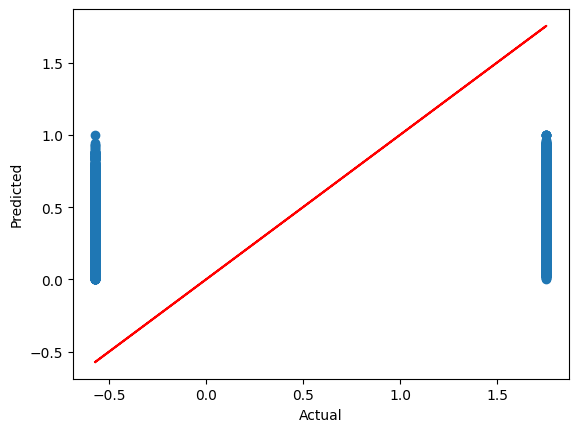

In [97]:
#plot Logistic Regression
plt.scatter(y_test,y_pred_proba)
plt.plot(y_test,y_test,color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

